In [94]:
# -*- coding: utf-8 -*-

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# RETRIEVING AND BASIC FORMATTING EXCEL FILES

## Retrieving the .xlsx files
Find the directory where the excel files are living. 

Then **'excel_files'** will report what lives inside the folder. 

Note: Any additional excel files you want analysed will need to be put into the same location as **'directory'.**

In [3]:
directory = r"\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\X_Data\Data - ARR\_CONSOLIDATED v2"
files = os.listdir(directory)
excel_files = []
for f in files:
    if ".xlsx" in f:
        excel_files.append(f)
excel_files

['20170429 9_28 Family Types Log.xlsx',
 '20170429 9_28 FamilyCategory Log.xlsx',
 '20170429 9_28 FamilySubCategory Log.xlsx',
 '20170429 9_28 Host Families Log.xlsx',
 '20170429 9_28 Nested Families Log.xlsx',
 '20170429 9_28 OmniClass Log.xlsx',
 '20170429 9_28 Parameters Log.xlsx',
 '20170429 9_28 ParameterValuesByTypes Log.xlsx',
 '20170429 9_28 Reference Planes Log.xlsx',
 '20170429 9_28 Units Log.xlsx',
 '20170501 6_28 Materials Log.xlsx']

## xlsx. key and values

Use <b>keys</b> to pair each key with each excel file in <b>excel_files</b>. This is so that you don't have to type the long file name everytime you need to call it in the rest of the code. 

<b>file_dict</b> will tell you which excel file is paired with each key.

In [4]:
keys = [
        "FamilyTypes",
        "FamilyCategory",
        "FamilySubCategory",
        "HostFamilies",
        "NestedFamilies",
        "OmniClass",
        "Parameters",
        "ParameterValuesByTypes",
        "ReferencePlanes",
        "Units",
        "Materials"
       ]

file_dict = {key: value for (key, value) in zip(keys, excel_files)}
file_dict

{'FamilyCategory': '20170429 9_28 FamilyCategory Log.xlsx',
 'FamilySubCategory': '20170429 9_28 FamilySubCategory Log.xlsx',
 'FamilyTypes': '20170429 9_28 Family Types Log.xlsx',
 'HostFamilies': '20170429 9_28 Host Families Log.xlsx',
 'Materials': '20170501 6_28 Materials Log.xlsx',
 'NestedFamilies': '20170429 9_28 Nested Families Log.xlsx',
 'OmniClass': '20170429 9_28 OmniClass Log.xlsx',
 'ParameterValuesByTypes': '20170429 9_28 ParameterValuesByTypes Log.xlsx',
 'Parameters': '20170429 9_28 Parameters Log.xlsx',
 'ReferencePlanes': '20170429 9_28 Reference Planes Log.xlsx',
 'Units': '20170429 9_28 Units Log.xlsx'}

## FUNCTIONS TO FORMAT EXCEL FILES

### Removing the common file path characters from original family file path name

The example file path below is very long. In order to cut the fat out of the long file path, the common characters from each file path is removed. 

\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Double Hung\Double Hung_3 Panel.rfa

Therefore, the start of the file path <b>\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content</b> is removed in every spreadsheet.

### Removing the rfa. name from FamilyFilePath.

In the excel files, the family name (.rfa) is part of the FamilyFilePath column.

e.g. \\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Special\<u>Window Lancet_basic.rfa</u>

### Determines whether the family is an .rfa or from a .txt catalogue file.

<b> remove_rfaName</b> removes the family name from the FamilyFilePath column. This allows us to find things such as the count of how many families there are within a particular master content folder. It splits the <b>full_filepath</b> path by each \ .

<b>joined_again</b> will join the file path back through the \ except for the last one. The new file path is appended on a FamilyFilePath column.

### Determines whether the family is an .rfa or from a .txt catalogue file.
<b>getFileType</b> removes the last three characters from the FamilyFilePath.

<b>stripFileType</b> removes the last four characters (including the '.') from the FamilyName.

In [5]:
commonPartofFilePath = len(r'\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content')
print commonPartofFilePath
def stripCommonPath(row):
        return row.FamilyFilePath[commonPartofFilePath+1:]
    
def remove_rfaName(row):
    full_filepath = row.FamilyFilePath
    split = full_filepath.split("\\")[:-1]
    joined_again = ("\\".join(split))
    return  joined_again

def getFileType(row):
    return row.FamilyFilePath[-3:]

def stripFileType(row):
    return row.FamilyName[:-4]

95


# FAMILY CATEGORIES

<b>fc_path</b> and <b>fc</b> reads the data from the Family Categories excel file

In [6]:
fc_path = os.path.join(directory, file_dict["FamilyCategory"])
fc = pd.read_excel(fc_path)

fc["FamilyFilePath"] = fc.apply(remove_rfaName, axis=1)
fc["FamilyFilePath"] = fc.apply(stripCommonPath, axis=1)
fc.head()

,FamilyFilePath,FamilyName,Category
0,Windows\Structural,Window_Square Opening_WIN.rfa,Windows
1,Windows\Structural,Window_Round Opening_WIN.rfa,Windows
2,Windows\Special,Window Round_basic.rfa,Windows
3,Windows\Special,Window Lancet_basic.rfa,Windows
4,Windows\Special,Window Arched Top_basic.rfa,Windows


## No. of families in a Category

<b> fc_counts</b> will count the number of families there are in a category.

Note: This reported count will only be accurate if there is only one instance of the family in the FamilyName.

In [7]:
fc_counts = fc["Category"].value_counts()

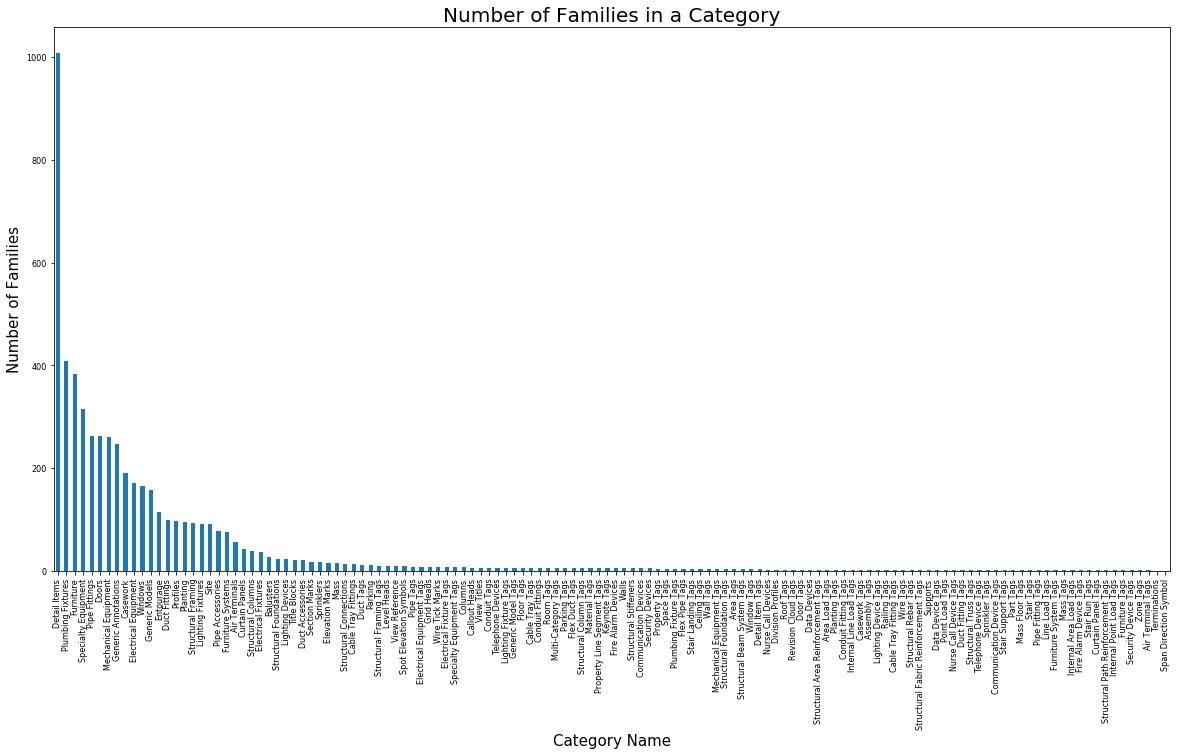

In [8]:
fc_counts.plot(kind="bar", fontsize = 8);
plt.title ("Number of Families in a Category", fontsize=20)
plt.xlabel("Category Name", fontsize = 15)
plt.ylabel("Number of Families", fontsize = 15)
plt.show()

## No. of families in a Category (Highest Offenders)

Use <b>cutoff</b> to filter the graph based on the number of families there are in a category.

e.g. cutoff > 15

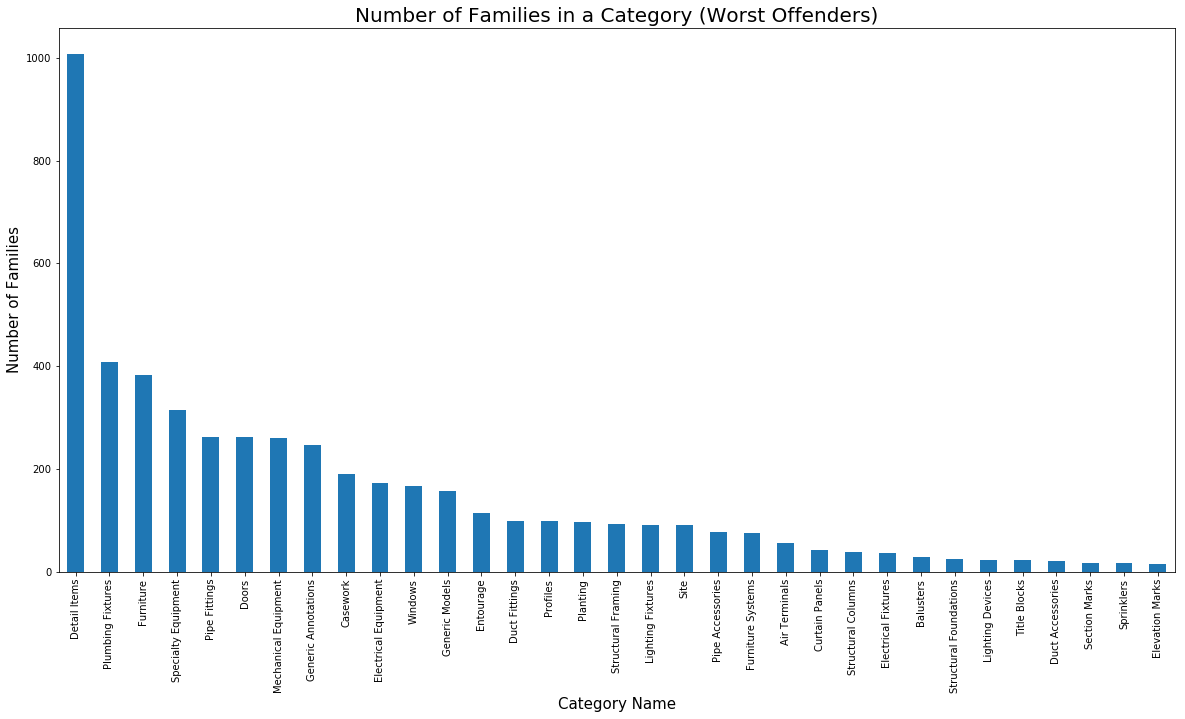

In [9]:
cutoff = 15

fc_counts[fc_counts>cutoff].plot(kind="bar");
plt.title ("Number of Families in a Category (Worst Offenders)", fontsize=20)
plt.xlabel("Category Name", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

## Filter and List No. of families in a Category

Use <b>fc_counts</b> to filter and list any high or low offenders.

In [10]:
fc_counts[fc_counts <= 2]

Roof Tags                               2
Revision Cloud Tags                     2
Door Tags                               2
Data Devices                            2
Structural Area Reinforcement Tags      2
Area Load Tags                          2
Planting Tags                           2
Conduit Fitting Tags                    2
Internal Line Load Tags                 2
Casework Tags                           2
Assembly Tags                           2
Lighting Device Tags                    2
Railing Tags                            2
Cable Tray Fitting Tags                 2
Wire Tags                               2
Structural Rebar Tags                   2
Structural Fabric Reinforcement Tags    2
Supports                                2
Data Device Tags                        2
Point Load Tags                         2
Nurse Call Device Tags                  2
Duct Fitting Tags                       2
Structural Truss Tags                   2
Telephone Device Tags             

# FAMILIES IN FOLDERS

## No. of families in each folder

Note: This includes subfolders

<b>folder_counts</b> will count the number of families there are in a folder.

In [11]:
folder_counts = fc["FamilyFilePath"].value_counts()

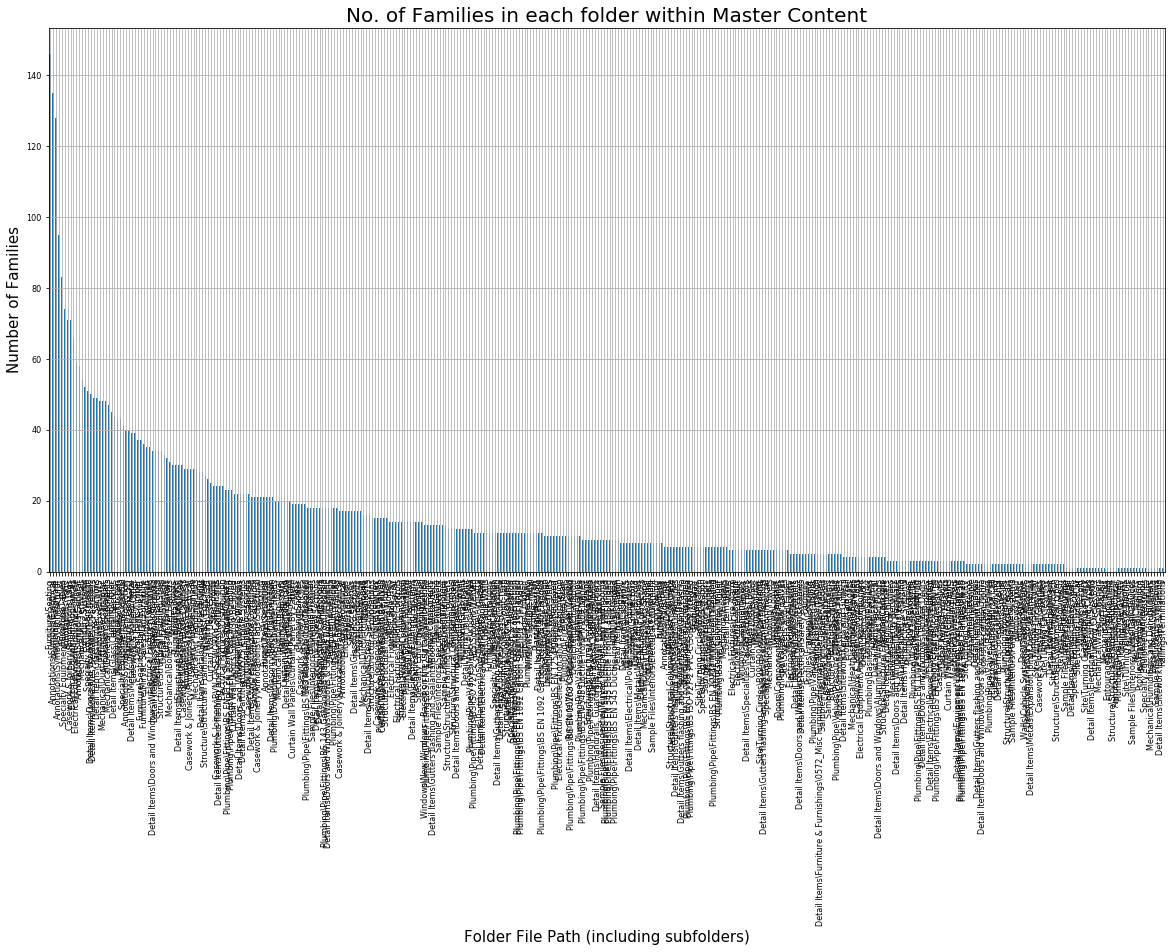

In [12]:
folder_counts.plot(kind="bar", grid=True, fontsize = 8);
plt.title ("No. of Families in each folder within Master Content", fontsize=20)
plt.xlabel("Folder File Path (including subfolders)", fontsize = 15)
plt.ylabel("Number of Families", fontsize = 15)
plt.show()

## No. of families in each folder (Worst Offenders)

Use <b>cutoff</b> to filter the graph based on the number of families there are in each folder in the master content.

e.g. cutoff > 15

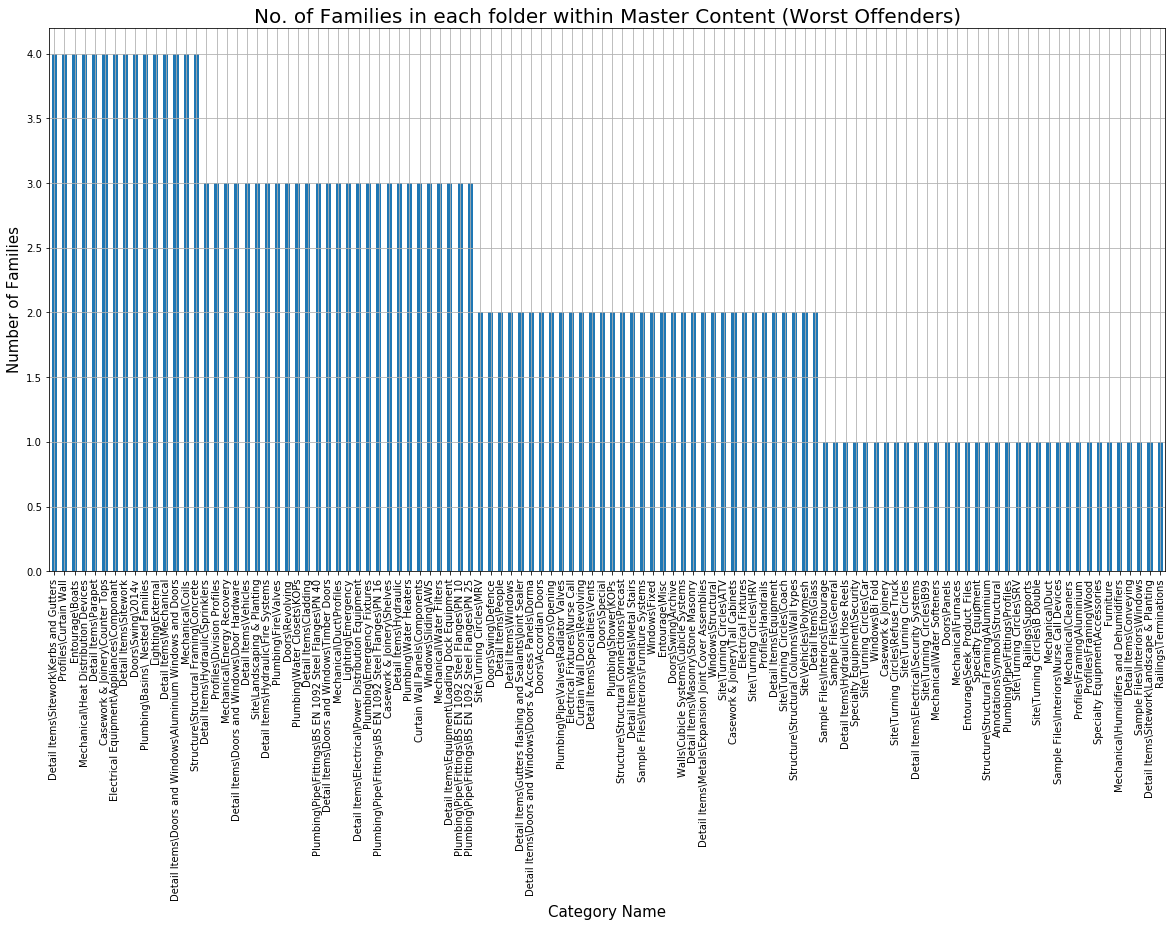

In [13]:
cutoff = 5

folder_counts[folder_counts<cutoff].plot(kind="bar", grid=True);
plt.title ("No. of Families in each folder within Master Content (Worst Offenders)", fontsize=20)
plt.xlabel("Category Name", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

# FAMILY TYPES

<b>ft</b> and <b>ft_path</b> reads from the Family Types excel file.

In [14]:
ft_path = os.path.join(directory, file_dict["FamilyTypes"])
ft = pd.read_excel(ft_path)

ft["fileType"] = ft.apply(getFileType, axis=1)
ft["FamilyName"] = ft.apply(stripFileType, axis=1)
ft["FamilyFilePath"] = ft.apply(remove_rfaName, axis=1)
ft["FamilyFilePath"] = ft.apply(stripCommonPath, axis=1)

ft.head()

,FamilyFilePath,FamilyName,FamilyTypeName,fileType
0,Windows\Special,Window Round_basic,,rfa
1,Windows\Special,Window Lancet_basic,,rfa
2,Windows\Special,Window Arched Top_basic,,rfa
3,Windows\Special,Skylight_Velux_FCM_WIN,,rfa
4,Windows\Special,Skylight_Operable_WIN,600 x 600mm,rfa


## No. of Family Types

<b>ft_counts</b> will count the number of family types there are for each family.

In [15]:
ft_counts = ft.FamilyName.value_counts()

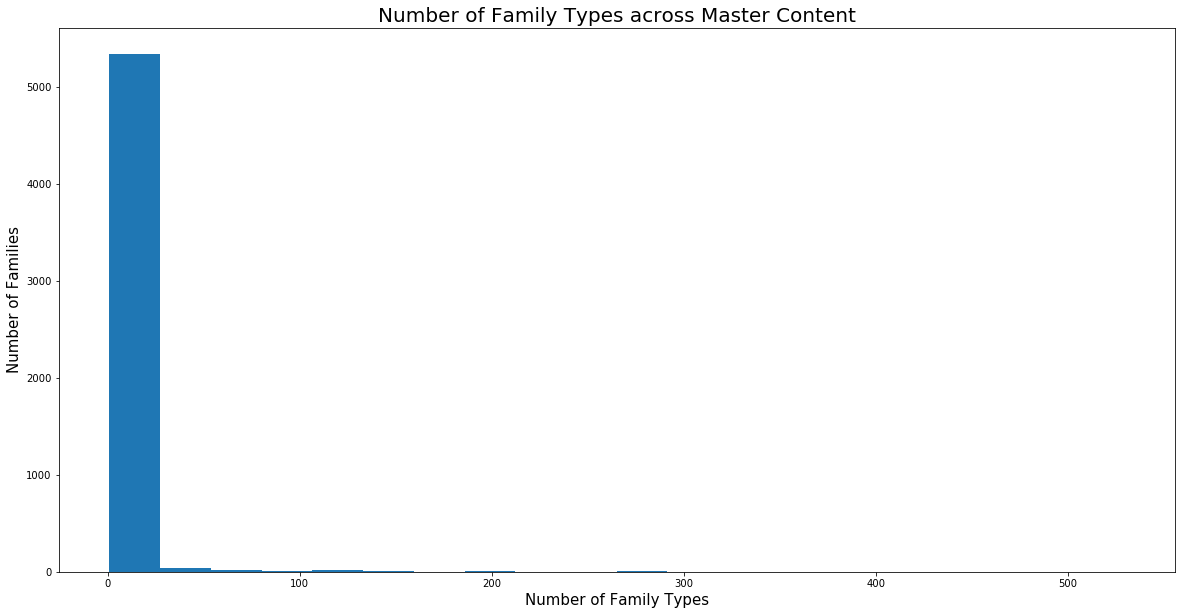

In [16]:
plt.hist(ft_counts, bins=20)
plt.title("Number of Family Types across Master Content", fontsize=20)
plt.xlabel("Number of Family Types", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

## No. of Family Types (Highest Offenders)

Use <b>cutoff</b> to filter the graph based on the number of families there are in a category.

e.g. cutoff > 50

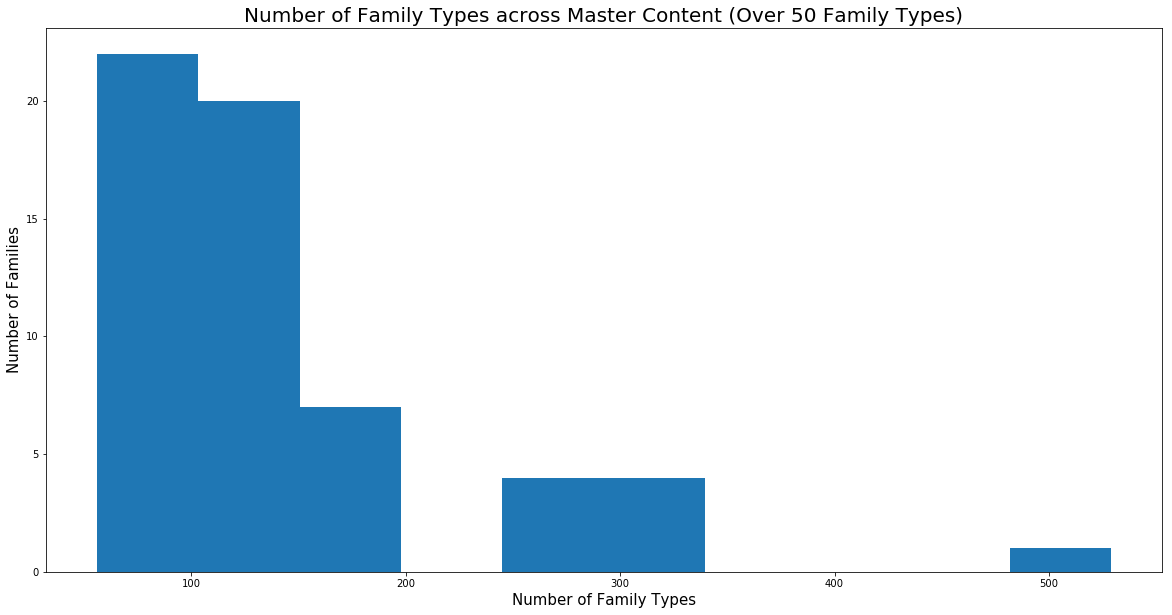

In [17]:
cutoff = 50

plt.hist(ft_counts[ft_counts>cutoff])
plt.title("Number of Family Types across Master Content (Over 50 Family Types)", fontsize=20)
plt.xlabel("Number of Family Types", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

## Families with 50+ family types

In [18]:
ft_counts[ft_counts>50]

Supply Diffuser_Sidewall                             529
HSS_Hollow Structural Section_Pro                    333
CISC Wide Flange Shapes_Side                         294
CISC Wide Flange Shapes_Section                      294
CISC Wide Flange Shapes_Top                          294
W_Wide Flange                                        274
W_Wide Flange_Pro                                    267
WT_Structural Tee_Pro                                267
WT_Structural Tee                                    267
Table_HermanMiller_DU6ACS_RectangularTable_C_Foot    192
CISC WT Shapes_Top                                   190
CISC WT Shapes_Section                               190
CISC WT Shapes_Side                                  190
Table_HermanMiller_DU6ATS_RectangularTable_T_Foot    180
VAV Outlet Plenum_Wye                                153
VAV Outlet Plenum_Elbow                              153
Louvre_Extruded_200 mm Pitch                         150
Plate                          

## Families with 500+ family types?

The high count of family types means that these families have a Revit catalogue file attached to it. 

The code below differentiates the .txt catalogue files from the .rfa files.

## .rfa vs .txt Family Types 

### Filtering for .txt files

<b>ft_hasTxt</b> filters for family types that are from txt catalog files.

In [19]:
ft_hasTxt = ft[ft.fileType=="txt"]
ft_hasTxt.head()

,FamilyFilePath,FamilyName,FamilyTypeName,fileType
156,Windows\Double Hung,Double Hung_3LT,1816,txt
157,Windows\Double Hung,Double Hung_3LT,1818,txt
158,Windows\Double Hung,Double Hung_3LT,1822,txt
159,Windows\Double Hung,Double Hung_3LT,1824,txt
160,Windows\Double Hung,Double Hung_3LT,1828,txt


### Filtering for .rfa files

<b>ft_noTxt</b> filters for family types that are from within the Revit family.

In [20]:
ft_noTxt = ft[ft.fileType=="rfa"]
ft_noTxt.head(10)

,FamilyFilePath,FamilyName,FamilyTypeName,fileType
0,Windows\Special,Window Round_basic,,rfa
1,Windows\Special,Window Lancet_basic,,rfa
2,Windows\Special,Window Arched Top_basic,,rfa
3,Windows\Special,Skylight_Velux_FCM_WIN,,rfa
4,Windows\Special,Skylight_Operable_WIN,600 x 600mm,rfa
5,Windows\Special,Skylight_Operable_WIN,900 x 600mm,rfa
6,Windows\Special,Skylight_Operable_WIN,900 x 900mm,rfa
7,Windows\Special,Round with Trim_WIN,0610 mm Diameter,rfa
8,Windows\Special,Round with Trim_WIN,0915mm Diameter,rfa
9,Windows\Special,Round with Trim_WIN,1220mm Diameter,rfa


### No. of .txt vs .rfa family types

<b>fileType_counts</b> counts the number of .rfa vs .txt family types.

In [21]:
fileType_counts = ft.fileType.value_counts()

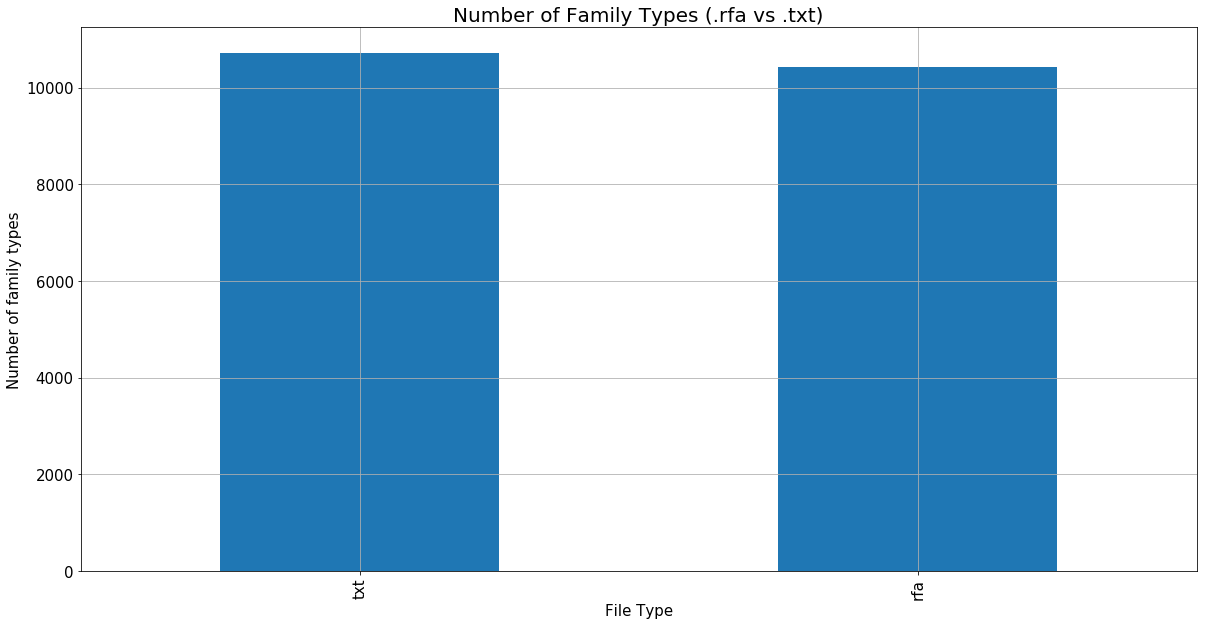

In [22]:
fileType_counts.plot(kind="bar", grid=True, fontsize=15)
plt.title("Number of Family Types (.rfa vs .txt)", fontsize=20)
plt.xlabel("File Type", fontsize=15)
plt.ylabel("Number of family types", fontsize=15)
plt.show()

### No. of Family Types for native .rfa families

<b>rfaType_counts</b> counts the number of family types within the native rfa family.

In [23]:
rfaType_counts = ft_noTxt[["FamilyName","FamilyTypeName"]].groupby("FamilyName").agg("count")

rfaType_counts.head()

,FamilyTypeName
FamilyName,
1 Bay Window,2
1 Bay Window - Non Hosted,1
10P_Perimeter_Bench_FYS,1
115_BVNDH_WC Cubicle,3
12P_Meeting_FYS,1


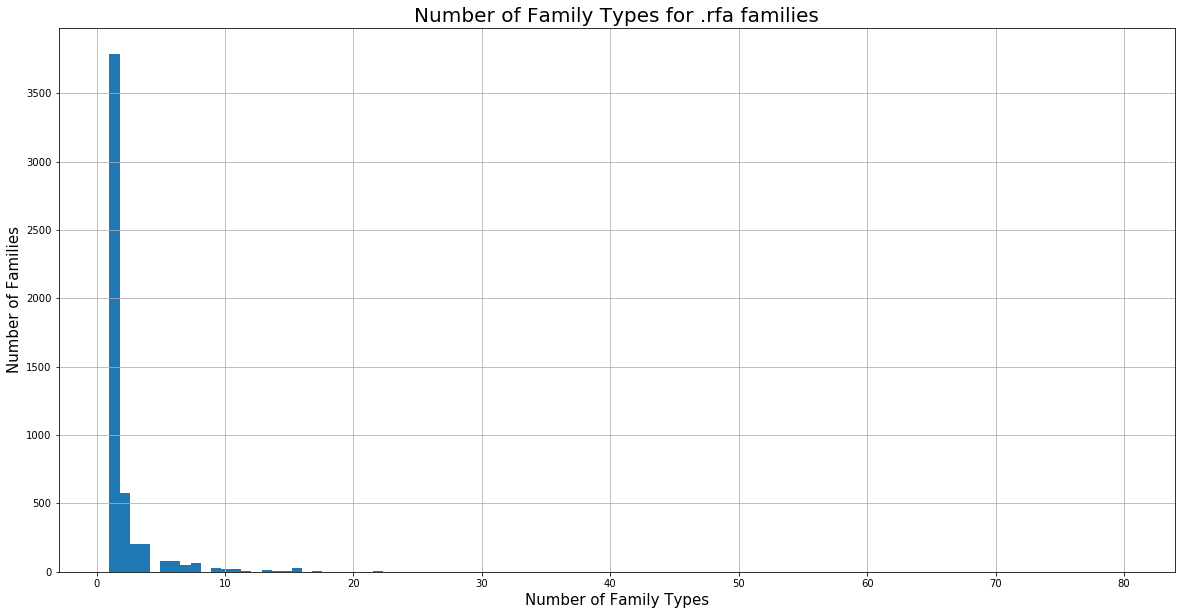

In [24]:
rfaType_counts.hist(bins=100)
plt.title("Number of Family Types for .rfa families", fontsize=20)
plt.xlabel("Number of Family Types", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)

### No. of Family Types for native .rfa families (Worst Offenders)

In [25]:
rfaType_counts[rfaType_counts.FamilyTypeName>50]

,FamilyTypeName
FamilyName,
Timber Stud_Section_DCO,80
Weights equipment_SEQ,67


### No. of Family Types from .txt files

In [26]:
txtType_counts = ft_hasTxt[["FamilyName","FamilyTypeName"]].groupby("FamilyName").agg("count")

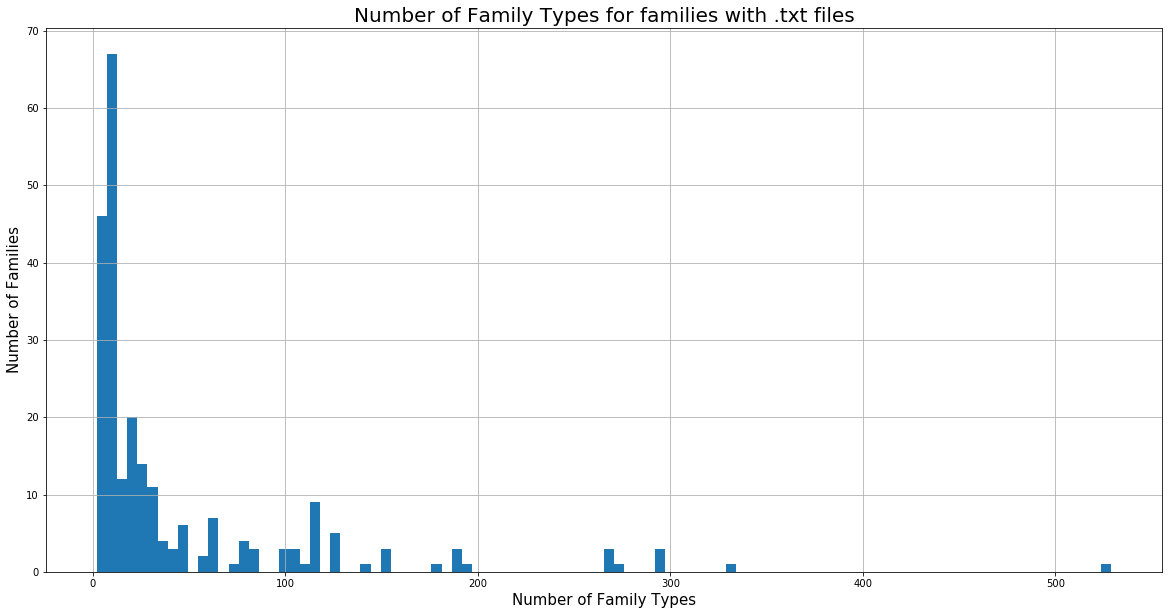

In [27]:
txtType_counts.hist(bins=100)
plt.title("Number of Family Types for families with .txt files", fontsize=20)
plt.xlabel("Number of Family Types", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

### No. of Family Types from .txt files > 200

In [28]:
txtType_counts[txtType_counts.FamilyTypeName>200]

,FamilyTypeName
FamilyName,
CISC Wide Flange Shapes_Section,294
CISC Wide Flange Shapes_Side,294
CISC Wide Flange Shapes_Top,294
HSS_Hollow Structural Section_Pro,333
Supply Diffuser_Sidewall,529
WT_Structural Tee,267
WT_Structural Tee_Pro,267
W_Wide Flange,274
W_Wide Flange_Pro,267


### ***REVISIT***

In [29]:
def has_txt_catalogue(row):
    """Checks to see if theres a txt file corresponding to this family
    
    Very slow, needs work at some point
    """
    return ft[(ft.fileType=="txt") & (ft.FamilyName==row.FamilyName)].shape[0]

ft_noTxt["catalogueSize"] = ft_noTxt.apply(has_txt_catalogue, axis=1)
ft_noTxt.head()

Q:\Users\arivera\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,FamilyFilePath,FamilyName,FamilyTypeName,fileType,catalogueSize
0,Windows\Special,Window Round_basic,,rfa,0
1,Windows\Special,Window Lancet_basic,,rfa,0
2,Windows\Special,Window Arched Top_basic,,rfa,0
3,Windows\Special,Skylight_Velux_FCM_WIN,,rfa,0
4,Windows\Special,Skylight_Operable_WIN,600 x 600mm,rfa,0


In [30]:
ft_noTxt.shape

(10436, 5)

# FAMILY SUBCATEGORIES

<b>fs_path</b> and <b>fs</b> reads the data from the Family Subcategories excel file.

<b>NOTE:</b> The columns - LinePatternName, LineWeight_Projection, LineWeight_Cut are dropped from the dataframe.

In [31]:
fs_path = os.path.join(directory, file_dict["FamilySubCategory"])
fs = pd.read_excel(fs_path)

fs["FamilyFilePath"] = fs.apply(remove_rfaName, axis=1)
fs["FamilyFilePath"] = fs.apply(stripCommonPath, axis=1)
fs["FamilyName"] = fs.apply(stripFileType, axis=1)

fs.drop(["LinePatternName", "LineWeight_Projection", "LineWeight_Cut"],axis=1, inplace=True)

fs.head()

,FamilyFilePath,FamilyName,Category,Subcategory
0,Windows\Structural,Window_Square Opening_WIN,Windows,Frame/Mullion
1,Windows\Structural,Window_Square Opening_WIN,Windows,Glass
2,Windows\Structural,Window_Square Opening_WIN,Windows,Opening
3,Windows\Structural,Window_Square Opening_WIN,Windows,Overhead
4,Windows\Structural,Window_Square Opening_WIN,Windows,Opening Elevation


## Number of subcategories of families

<b>fs_counts</b> and <b>grouped_subcat</b> counts the number of subcategories there are within each family.

In [32]:
fs_counts = fs["Subcategory"].value_counts()

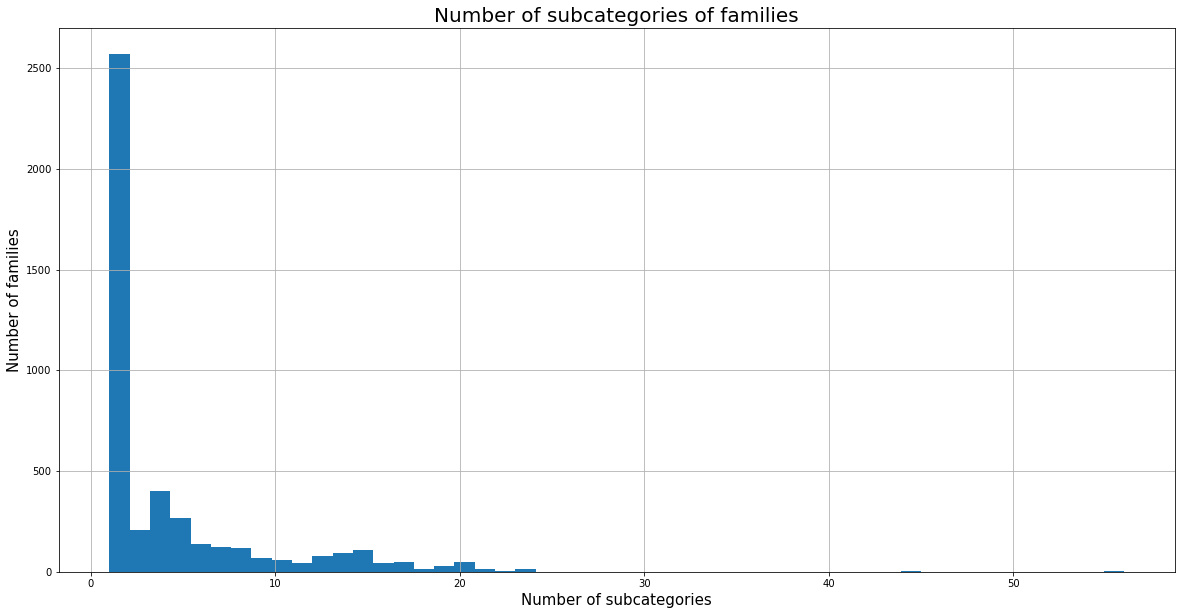

In [33]:
grouped_subcat = fs.groupby("FamilyName").agg(['count'])

grouped_subcfat["Subcategory"].hist(bins=50);
plt.title("Number of subcategories of families", fontsize=20)
plt.xlabel("Number of subcategories", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()

## Most used subcategories > 100

In [34]:
fs_counts[fs_counts>100]

Hidden Lines             4083
Medium Lines              607
Light Lines               546
Glass                     529
Heavy Lines               480
Opening                   443
Frame/Mullion             428
Center line               382
Panel                     272
Taps/Mixers               266
Waste Outlets             232
Penetration               231
Clearance Zones           228
FHRs/Hydrants             226
Fire Boosters/Pumps       224
Baths/Showers             222
Basins/Sinks/Tubs         221
Hardware                  216
Urinals                   216
Elevation Swing           189
Toilet/Bidets             178
Sill/Head                 166
Plan Swing                164
Seating_Freestanding      164
Swing_Elevation           161
Shower Fall               154
Swing_Plan                150
Circulation Space         141
Gas Supply Fixtures       140
Gas Cooking Equipment     140
Rigid Links               132
Location Lines            132
Thin Lines                110
Hidden Fac

## Least used subcategories < 100

In [35]:
fs_counts[fs_counts<100]

Light Source                            92
Architrave/Trim                         92
Property Line Segments                  91
Property Lines                          91
Survey Point                            91
Project Base Point                      91
Pads                                    91
Stick Symbols                           85
Wide Lines                              84
Plan rep_Leaf_Thicknessâ€‹              78
Thresholds                              77
Plan rep_Leaf_Single line               76
Shelving                                74
Grab Rails                              70
Downpipes                               68
Glazing - Aluminium                     68
Door Swing                              67
Elevation_Swingâ€‹                      66
Toilets/Bidets                          65
Structural Opening                      63
Elevation_Linework_Shelving             59
Carcass                                 59
Hardware_Setout reference               59
Section_Lin

## No. of subcategories  (Worst Offenders)

In [36]:
sub_counts = grouped_subcat["Subcategory"]
sub_counts[sub_counts["count"]>20]

,count
FamilyName,
Articulated Vehicle_SIT,24
BVN-Casework - ALL - FAMILY,23
Car And Trailer_SIT,24
DCW_Door_Glass Sliding Double,21
Drainage_Roof Drain 100mm_DCO,56
Drainage_Roof Drain 150mm_DCO,56
Drainage_Roof Drain 200mm_DCO,56
Drainage_Roof Drain_DCO,56
Exit_Fire Directional Sign Arrow,21


## BVN vs non BVN Subcats

### Checks to see whether family subcategory is part of the BVN list

<b>fs_BVN</b> is a list of the BVN subcategories.

<b>is_legit</b> checks to see if the values in the Subcategories column are a part of the <b>fs_BVN</b> list and adds to the table.

In [37]:
fs_BVN = ['AV ', 'Air Handling units', 'Alarms/Sensors', 'Appliance_Fixed', 'Appliance_Freestanding', 'Appliances', 'Architrave/Trim', 'Audio Equipment', 'Balusters', 'Basins/Sinks/Tubs', 'Baths/Showers', 'Bedding', 'Bike Racks', 'Boilers', 'Cabinets/Panels', 'Carcass/Framing', 'Center line', 'Chilled Water Sets', 'Chillers', 'Chilling Beams', 'Chord', 'Clearance Zones', 'Common Edges', 'Common edges', 'Condensing Units', 'Contour', 'Conveyor Systems', 'Cooling Towers', 'Counter Tops', 'Display Boards', 'Downpipes', 'Downpipes overhead', 'Drawers/Dressers', 'Drop', 'Extraction Systems', 'FHRs/Hydrants ', 'Fans', 'Fire Boosters/Pumps', 'Form', 'Frame', 'Frame/Mullion', 'General Purpose Outlets', 'Girder', 'Glass', 'Grab Rails', 'Graphics', 'Gridlines', 'Ground Cover', 'Hard Landscaping', 'Hardware', 'Hardware_PWD', 'Heaters', 'Hidden Faces', 'Hidden Lines', 'Hidden Lines OH', 'Hidden Lines UB', 'Horizontal Bracing', 'IT', 'Joist', 'Kicker Bracing', 'Light Lines', 'Light Source', 'Lighter Lines', 'Lightest lines', 'Lighting', 'Mass Exterior Wall', 'Mass Floor', 'Mass Glazing', 'Mass Interior Wall', 'Mass Opening', 'Mass Roof', 'Mass Shade', 'Mass Skylight', 'Mass Zone', 'Medium Lines', 'Moulding/Muntins', 'Nodes', 'Opening', 'Other', 'Outdoor Furniture', 'Pads', 'Panel', 'Parking Layout', 'Partitions', 'Pattern', 'Pattern Fill', 'Pattern Lines', 'Pedestals', 'Penetration', 'People', 'Plinths', 'Primary Contours', 'Property Lines', 'Purlin', 'Railings Beyond Cut Line', 'Rails', 'Reveal', 'Rigid Links', 'Rise', 'Sash', 'Sealant', 'Seating_Fixed', 'Seating_Freestanding', 'Secondary Contours', 'Security Equipment', 'Shelving', 'Shelving_Fixed', 'Shelving_Freestanding', 'Signage', 'Sill/Head', 'Sill_Wall', 'Site Furniture', 'Site Scrape Contour', 'Speakers', 'Stick Symbols', 'Storage', 'Structural Opening', 'Sundries', 'Sweep_Cornice', 'Sweep_Skirting', 'Swing_ Elevation', 'Swing_ Plan', 'Swing_Elevation', 'Swing_Plan', 'Switchboards', 'Switches', 'Tables_Fixed', 'Tables_Freestanding', 'Taps/Mixers', 'Thick Lines', 'Thicker Lines', 'Thickest Lines', 'Thresholds', 'Toilets/Bidets', 'Transportation Equipment', 'Trees/Shrubs', 'Triangulation Edges', 'Urinals', 'Utilities', 'Variable Air Volume Terminals', 'Vehicles', 'Vertical Bracing', 'Waste outlets', 'Water Storage', 'Way Finding', 'Web', 'Wheelstops', 'Workstations/Desks']

def is_legit(row):
    return row.Subcategory in fs_BVN

fs["BVNsubcat"] = fs.apply(is_legit, axis=1)

fs.head(100)

,FamilyFilePath,FamilyName,Category,Subcategory,BVNsubcat
0,Windows\Structural,Window_Square Opening_WIN,Windows,Frame/Mullion,True
1,Windows\Structural,Window_Square Opening_WIN,Windows,Glass,True
2,Windows\Structural,Window_Square Opening_WIN,Windows,Opening,True
3,Windows\Structural,Window_Square Opening_WIN,Windows,Overhead,False
4,Windows\Structural,Window_Square Opening_WIN,Windows,Opening Elevation,False
5,Windows\Structural,Window_Square Opening_WIN,Windows,Sill/Head,True
6,Windows\Structural,Window_Square Opening_WIN,Windows,Hidden Lines,True
7,Windows\Structural,Window_Round Opening_WIN,Windows,Frame/Mullion,True
8,Windows\Structural,Window_Round Opening_WIN,Windows,Glass,True
9,Windows\Structural,Window_Round Opening_WIN,Windows,Opening,True


## Families with non-BVN subcategories

<b>not_legit</b> lists the families that have wrong subcategories and its wrong subcategory name.

In [38]:
not_legit = fs[fs.BVNsubcat==False]

print "Number of non-BVN subcategories:", not_legit.shape
not_legit.head(10)

Number of non-BVN subcategories: (7578, 5)


,FamilyFilePath,FamilyName,Category,Subcategory,BVNsubcat
3,Windows\Structural,Window_Square Opening_WIN,Windows,Overhead,False
4,Windows\Structural,Window_Square Opening_WIN,Windows,Opening Elevation,False
10,Windows\Structural,Window_Round Opening_WIN,Windows,Overhead,False
11,Windows\Structural,Window_Round Opening_WIN,Windows,Opening Elevation,False
14,Windows\Special,Window Round_basic,Windows,Trim,False
18,Windows\Special,Window Round_basic,Windows,Elevation Swing,False
21,Windows\Special,Window Round_basic,Windows,Plan Swing,False
22,Windows\Special,Window Lancet_basic,Windows,Trim,False
26,Windows\Special,Window Lancet_basic,Windows,Elevation Swing,False
29,Windows\Special,Window Lancet_basic,Windows,Plan Swing,False


## No. of times non-BVN subcategories are used

In [39]:
print len(not_legit.Subcategory.unique())
not_legit.Subcategory.value_counts()

642


Heavy Lines                             480
Waste Outlets                           232
FHRs/Hydrants                           226
Elevation Swing                         189
Toilet/Bidets                           178
Plan Swing                              164
Shower Fall                             154
Circulation Space                       141
Gas Supply Fixtures                     140
Gas Cooking Equipment                   140
Location Lines                          132
Thin Lines                              110
Fittings                                101
Property Line Segments                   91
Survey Point                             91
Project Base Point                       91
Wide Lines                               84
Plan rep_Leaf_Thicknessâ€‹               78
Plan rep_Leaf_Single line                76
Glazing - Aluminium                      68
Door Swing                               67
Elevation_Swingâ€‹                       66
Elevation_Linework_Swing        

# REVIT VERSION

**rv_path** and **rv** reads from the ParameterValuesByTypes excel file.

**NOTE:** The columns - "FamilyEditedLast", "ParameterName", "ParameterValue", "ParameterIsInstance", "ParamterIsFormula", "ParameterIsReporting", "ParameterStorageType" are dropped from the table below.

In [40]:
rv_path = os.path.join(directory, file_dict["ParameterValuesByTypes"])
rv = pd.read_excel(rv_path)

rv.drop(["FamilyEditedLast", "ParameterName", "ParameterValue", "ParameterIsInstance", "ParamterIsFormula", "ParameterIsReporting", "ParameterStorageType"],axis=1,inplace=True)

rv.head()

,FamilyFilePath,FamilyName,RevitVersion,FamilyCategory,FamilyTypeName
0,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Window_Square Opening_WIN.rfa,2015,Windows,0400 x 1200mm
1,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Window_Square Opening_WIN.rfa,2015,Windows,0400 x 1200mm
2,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Window_Square Opening_WIN.rfa,2015,Windows,0400 x 1200mm
3,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Window_Square Opening_WIN.rfa,2015,Windows,0400 x 1200mm
4,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Window_Square Opening_WIN.rfa,2015,Windows,0400 x 1200mm


## Number of Families in a Revit Version

In [41]:
nameAndVersion = rv[["RevitVersion", "FamilyName"]]
nameAndVersion.drop_duplicates(inplace=True)

rv_group = nameAndVersion.groupby("RevitVersion").agg("count")

Q:\Users\arivera\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [42]:
rv_group.head(9)

,FamilyName
RevitVersion,
2010,3
2011,22
2012,342
2013,308
2014,1617
2015,2610
2016,47
2017,2
MEP 2011,85


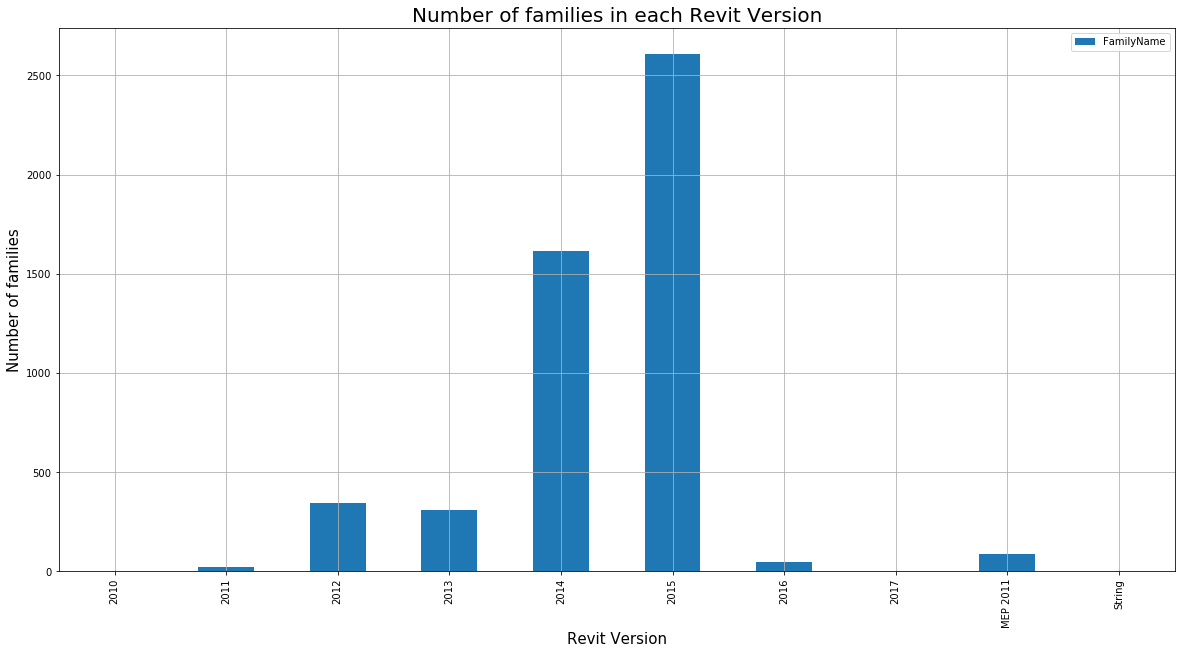

In [43]:
rv_group.plot(kind="bar", grid=True);
plt.title("Number of families in each Revit Version", fontsize=20)
plt.xlabel("Revit Version", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()

## Filter for names of families in a revit version

Change the Revit Version value in <b>rv_filter</b> to filter the list of family names for a particular Revit version

In [44]:
rv_filter = rv[rv.RevitVersion==2014]

rv_filter.drop("FamilyTypeName",axis=1,inplace=True)

rv_filter.drop_duplicates(inplace=True)

rv_filter.head(10)

Q:\Users\arivera\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,FamilyFilePath,FamilyName,RevitVersion,FamilyCategory
467,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Skylight_Operable_WIN.rfa,2014,Windows
1426,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Sliding_Single Row_XOX_WIN.rfa,2014,Windows
1489,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Sliding_Single Row_XOOX_WIN.rfa,2014,Windows
1552,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Sliding_Single Row_XO_WIN.rfa,2014,Windows
1615,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Sliding_Single Row_OXXO_WIN.rfa,2014,Windows
1741,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Sliding-Metal Frame-AWS 461 End_WIN.rfa,2014,Windows
1805,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Sliding-Metal Frame-AWS 461 Centre_WIN.rfa,2014,Windows
1869,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Sliding-Metal Frame-AWS 461 Both_WIN.rfa,2014,Windows
2856,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Louvre Window_WIN.rfa,2014,Windows
3970,\\dc2-file001\Practice\InfoTech\BIM\Revit\Revi...,Louvre Window_Timber_WIN .rfa,2014,Windows


## Number of Categories in a particular Revit Version = 2014

In [45]:
catAndVersion = rv_filter[["RevitVersion", "FamilyCategory"]]

catAndVersion_group = catAndVersion.groupby("FamilyCategory").agg("count")

catAndVersion_group.sort_values(by="RevitVersion",ascending=False, inplace=True)

catAndVersion_group.head()

,RevitVersion
FamilyCategory,
Plumbing Fixtures,225
Doors,187
Specialty Equipment,160
Detail Items,156
Furniture,133


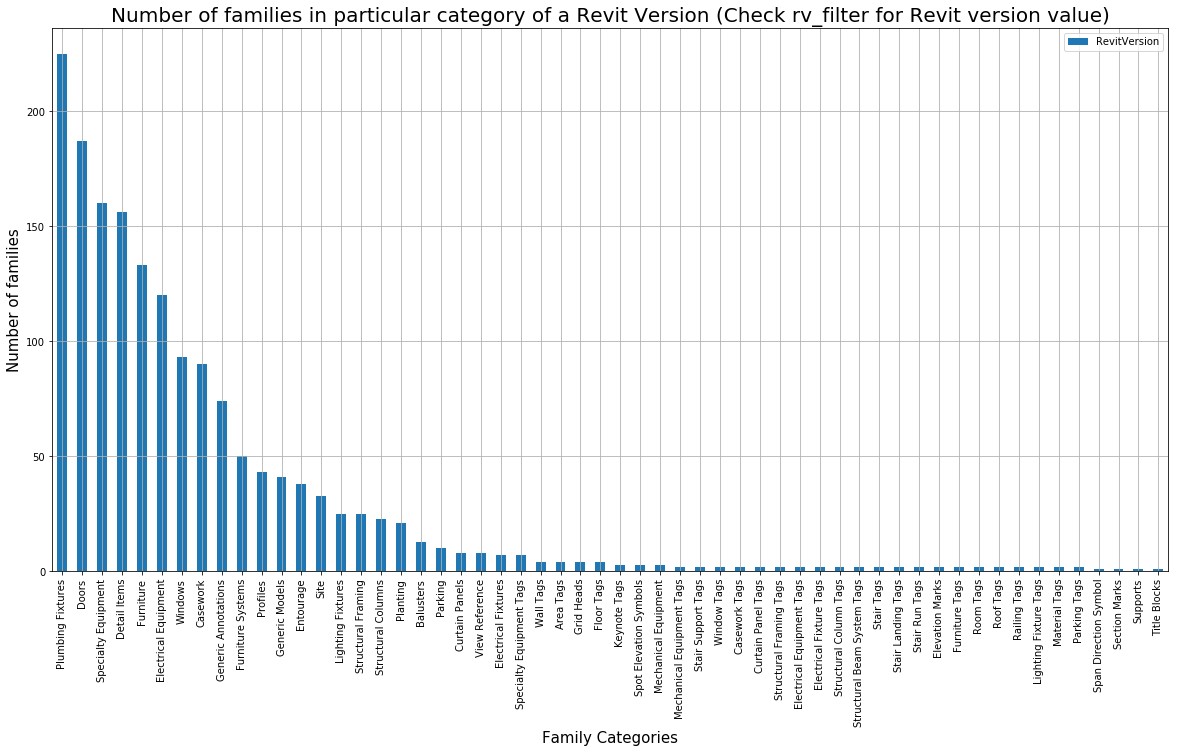

In [46]:
catAndVersion_group.plot(kind="bar", grid=True);
plt.title("Number of families in particular category of a Revit Version (Check rv_filter for Revit version value)", fontsize=20)
plt.xlabel("Family Categories", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()

# UNITS

**u_path** and **u** reads from the ParameterValuesByTypes excel file.

In [47]:
u_path = os.path.join(directory, file_dict["Units"])
u = pd.read_excel(u_path)

u["FamilyFilePath"] = u.apply(remove_rfaName, axis=1)
u["FamilyFilePath"] = u.apply(stripCommonPath, axis=1)
u["FamilyName"] = u.apply(stripFileType, axis=1)

u.head()

,FamilyFilePath,FamilyName,Unit,Accuracy,UnitDisplay,UnitSymbol
0,Windows\Structural,Window_Square Opening_WIN,Number,0.000001,General,n/a
1,Windows\Structural,Window_Square Opening_WIN,Length,1.000000,Millimeters,(UST_NONE)
2,Windows\Structural,Window_Square Opening_WIN,Area,0.010000,Square meters,(UST_NONE)
3,Windows\Structural,Window_Square Opening_WIN,Volume,0.010000,Cubic meters,(UST_NONE)
4,Windows\Structural,Window_Square Opening_WIN,Angle,0.010000,Decimal degrees,Â° (UST_DEGREE_SYMBOL)


## Units families are using

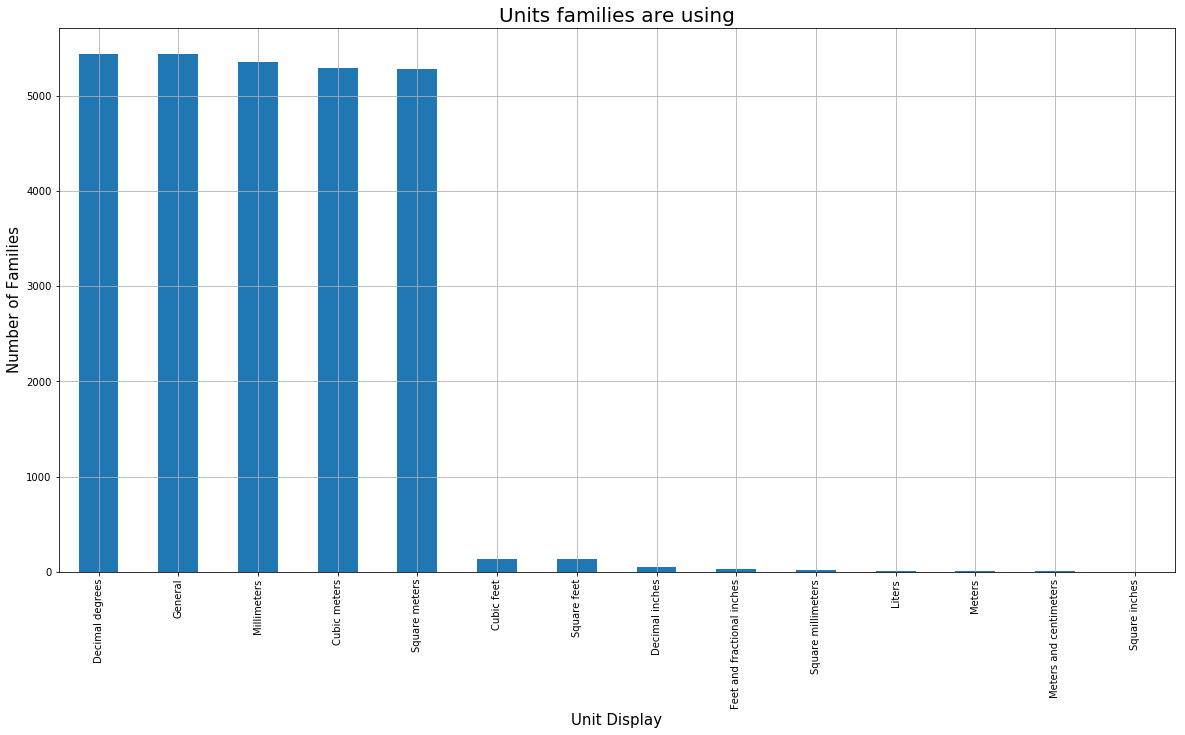

In [48]:
unit_group = u.groupby("UnitDisplay").agg("count")
unit_group.sort_values(by="FamilyName",ascending=False, inplace=True)

unit_group["FamilyName"].plot(kind="bar", grid=True);
plt.title("Units families are using", fontsize=20)
plt.xlabel("Unit Display", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

In [49]:
def get_unit_type(row):
    general_units = [u'General']

    metric_units = [u'Decimal degrees', 
                    u'Millimeters', 
                    u'Cubic meters',
                    u'Square meters', 
                    u'Square millimeters', 
                    u'Liters',
                    u'Meters', 
                    u'Meters and centimeters', ]

    us_evil_units = [u'Cubic feet',
                     u'Square feet',
                     u'Decimal inches',
                     u'Feet and fractional inches',
                     u'Square inches']
    if row.UnitDisplay in general_units:
        return "General"
    elif row.UnitDisplay in metric_units:
        return "Metric"
    elif row.UnitDisplay in us_evil_units:
        return "Evil"
    else:
        return "Alien"

In [50]:
u["unit_type"] = u.apply(get_unit_type, axis=1)
u.head()

,FamilyFilePath,FamilyName,Unit,Accuracy,UnitDisplay,UnitSymbol,unit_type
0,Windows\Structural,Window_Square Opening_WIN,Number,0.000001,General,n/a,General
1,Windows\Structural,Window_Square Opening_WIN,Length,1.000000,Millimeters,(UST_NONE),Metric
2,Windows\Structural,Window_Square Opening_WIN,Area,0.010000,Square meters,(UST_NONE),Metric
3,Windows\Structural,Window_Square Opening_WIN,Volume,0.010000,Cubic meters,(UST_NONE),Metric
4,Windows\Structural,Window_Square Opening_WIN,Angle,0.010000,Decimal degrees,Â° (UST_DEGREE_SYMBOL),Metric


In [51]:
fams = u.FamilyName.unique()

def inline_units(name):
    this_fam = u[u.FamilyName == name]
    new_row = {"FamilyName": name,
               "Number_unit_type": list(this_fam[this_fam.Unit=="Number"].unit_type)[0],
               "Length_unit_type": list(this_fam[this_fam.Unit=="Length"].unit_type)[0],
               "Area_unit_type":   list(this_fam[this_fam.Unit=="Area"  ].unit_type)[0],
               "Volume_unit_type": list(this_fam[this_fam.Unit=="Volume"].unit_type)[0],
               "Angle_unit_type":  list(this_fam[this_fam.Unit=="Angle" ].unit_type)[0]}
    return new_row
    
f = pd.DataFrame([inline_units(f) for f in fams])

## Families that are using Metric AND imperial Units

In [52]:
m="Metric"
dirty_families = f[(f.Angle_unit_type!=m)|(f.Area_unit_type!=m)|(f.Length_unit_type!=m)|(f.Volume_unit_type!=m)]

dirty_families.head()

,Angle_unit_type,Area_unit_type,FamilyName,Length_unit_type,Number_unit_type,Volume_unit_type
363,Metric,Evil,Paper Shredder_SEQ,Metric,General,Evil
371,Metric,Evil,Pool Cue_SEQ,Metric,General,Evil
492,Metric,Evil,Tennis Court (indoor)_SEQ,Evil,General,Evil
499,Metric,Metric,RearFolding_Basketball_Backstop_1937_SEQ,Metric,General,Evil
531,Metric,Evil,Exercise Equipment - Step Machine,Metric,General,Evil


There are {{dirty_families.shape[0]}} dirty families. {{(dict(dirty_families.Angle_unit_type.value_counts())["Metric"] / dirty_families.shape[0])*100}}% of angles are Metric.

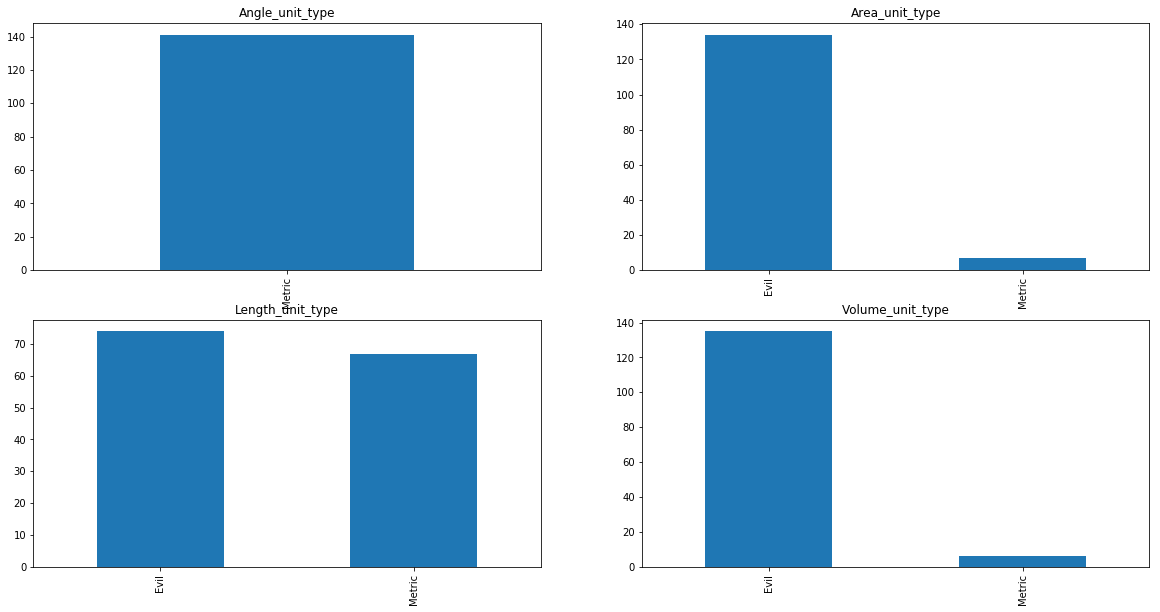

In [53]:
plt.figure(1)
for i, col in enumerate([u'Angle_unit_type', u'Area_unit_type', u'Length_unit_type', u'Volume_unit_type']):

    plt.subplot(221+i)
    dirty_families[col].value_counts().plot(kind="bar")
    plt.title(col)

plt.show()

# PARAMETERS

**p_path** and **p** reads from the ParameterValuesByTypes excel file.

In [54]:
p_path = os.path.join(directory, file_dict["Parameters"])
p = pd.read_excel(p_path)

p["FamilyFilePath"] = p.apply(remove_rfaName, axis=1)
p["FamilyFilePath"] = p.apply(stripCommonPath, axis=1)
p["FamilyName"] = p.apply(stripFileType, axis=1)

p.head()

,FamilyFilePath,FamilyName,ParameterName,ParameterIsDeterminedByFormula,ParameterIsInstance,ParameterIsReporting,ParameterStorageType
0,Windows\Structural,Window_Square Opening_WIN,Analytic Construction,False,False,False,String
1,Windows\Structural,Window_Square Opening_WIN,Assembly Code,False,False,False,String
2,Windows\Structural,Window_Square Opening_WIN,Construction Type,False,False,False,String
3,Windows\Structural,Window_Square Opening_WIN,Cost,False,False,False,Double
4,Windows\Structural,Window_Square Opening_WIN,Description,False,False,False,String


## Number of Parameters of Families

In [55]:
grouped_parameters = p.groupby("FamilyName").agg(['count'])

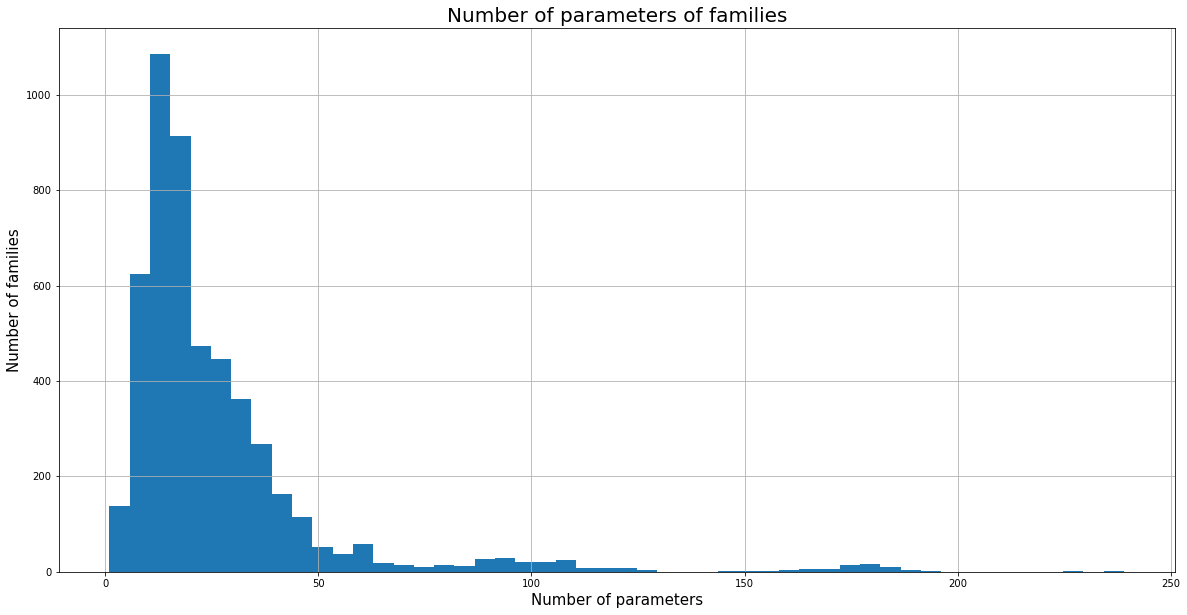

In [56]:
grouped_parameters["ParameterName"].hist(bins=50);
plt.title("Number of parameters of families", fontsize=20)
plt.xlabel("Number of parameters", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()

## Numbers of Parameters of Families (High Offenders)

In [57]:
param_counts = grouped_parameters["ParameterName"]
param_counts[param_counts["count"]>100]

,count
FamilyName,
Accordion_Double_DOR,128
Accordion_Single_DOR,125
Base Cabinet_Corner_LShape_CAS,184
Base Cabinet_Dishwasher_CAS,161
Base Cabinet_Door with Drawer_CAS,171
Base Cabinet_Double_CAS,184
Base Cabinet_Drawer_1_CAS,166
Base Cabinet_Drawer_2_CAS,168
Base Cabinet_Drawer_3_CAS,170


# SHARED PARAMETERS

## Checks to see if parameters are part of BVN's shared parameter list

In [58]:
p_BVN = ['_SPEC_WILKHAHN_ANSI/BIFMA_STANDARDS','_SPEC_WILKHAHN_DIN_EN_STANDARDS','_SPEC_WILKHAHN_FURNTECH-AFRDI_BLUE_TICK','_SPEC_WILKHAHN_FURNTECH-AFRDI_GREEN_TICK','_SPEC_WILKHAHN_GS_SYMBOL','_SPEC_WILKHAHN_Model','_SPEC_WILKHAHN_NPR_STANDARDS','_SPEC_WILKHAHN_Part_Number','_SPEC_WILKHAHN_Table_Length','_SPEC_WILKHAHN_Table_Width','_SPEC_WILKHAHN_URL','_SPEC_WILKHAHN_Version','_WILKHAHN Table Height','_WILKHAHN Table Length','_WILKHAHN Table Width','A3 Scale','Acoustic Performance','Acoustic Rating Rw','Adaptable','Additional Info- Fourth Line','Area Colour','Area_Colour_Bvn','Armpad Finish','AS1428 Tolerance','AS1482 Tolerance','Asset Number','Author','Back Finish','Balcony Area','Bars','Base Finish','Base Price','Bench_Material_Bvn','Bench_Thickness_Bvn','Benchtop Material','Benchtopfinish','Benchtopmaterial','Benchtopthickness','Bolt Latch','Briefed Area','Building Name','BVN Alphabet','Carcase Offset off Wall','Carcasefinish','Carcasematerial','Carcass Material','Carcass_Material_Bvn','Carcess_Thickness_Bvn','Caseworkoveralldepth','Caseworkoverallheight','Caseworkoverallwidth','Catalog','Catalog Code','Category Color','Cb Classification','Cb Code 1','Cb Description','Cb Group','Cdeb_Doorid','Cdeb_Rminstid','Cdeb_Status','Ceiling Acoustic Rating','Ceiling_Height_Bvn','Cf_1','Cf_2','CheckedBy_ANZRS','Clear Opening','Client Project Number','Closer','Column Length','Configured By','Configured By','Consultant 01','Consultant 01 Details','Consultant 02','Consultant 02 Details','Consultant 03','Consultant 03 Details','Consultant 04','Consultant 04 Details','Consultant 05','Consultant 05 Details','Copyright','Copyright','Copyright ©','Core','Core Name','CreatedBy_ANZRS','CreatedByURL_ANZRS','DAF_Created By_Username_t','DAF_Modified By_Username_t','DAF_Modified_Date_t','DAF_Modified_Date_t','DAF_Owned By_t','DAF_Revision number_t','Department_BVN','Depth_Bvn','Depth_Two_Bvn','Detailedcategory','Discipline','Door Grille/Undercut','Door Leaf Height','Door Leaf Thickness','Door Leaf Type','Door Leaf Width','Door Panel Height','Door Panel Thickness','Door Seals','Door Stop','Door Thickness','Door Thickness','Door Undercut','Double Rebate','Double Swing','Either Side Swing Away','Either Side Swing Towards','Electric Locking','Electromagnetic Hold Open','End Panel Side I Finish','End Panel Side II Finish','Expected Lifespan (Years)','Ext Frame_Offset EQUAL Host Wall thickness_i','FF&E Code','FF&E Comments','FF&E Description','FF&E Group','FF&E Issue','FF&E Item','FF&E Supplier','Ff_1','Ff_2','FF_SPECIFIC_1','Fire/Smoke Door','Flux Id','Frame Finish','Frame Overlaps Wall','Frame Profile','Frame to Match Wall Thickness','Front Panel Finish','Front Swing Away','Front Swing Towards','Frontpanel_Left_Material_Bvn','Frontpanel_Right_Material_Bvn','Frontpanel_Single_Material_Bvn','Generic Room Sheet Reference','Glazing','Glazing Material','Grade','Grid Prefix','Handle Height','Handle Offset','Head Details','Height_Bvn','Height_Skirting_Bvn','Height_Two_Bvn','Hfbs_Sub_Department','Hinge Side Swing Away','Hinge Side Swing Towards','HsbType','Ideate BIMLink','ItemCode','ItemCode_2','ItemDescription','ItemDescription_2','ItemGroup','ItemGroup_2','Jamb Details','Kicker Material','Kickerfinish','Kickerheight','Kickermaterial','Latch Side Swing Away','Latch Side Swing Towards','Leaf 1 Width','Leaf 2 Width','Leaf Height','Length','Level - Second Line','Lining_"Opposite Side"','Lining_"Placement Side"','Link_Status','Lock/Latch','Maintenance Schedule (Months)','Mass per m','Material Door Panel','Material Door Panel EXT','Material Door Panel INT','Material Frame','Material View Panel','Meeting Stile Detail','Modified Issue','ModifiedIssue','ModifiedIssue','Mounted_Top_Bvn','Mounting_Height_Bvn','Mounting_Height_Centre_Bvn','Mounting_Height_Top_Bvn','MOUNTING_HEIGHT_US_BVN','Mullion Height','No. of Parks','Original Model By','Other Protection','Overall_Height_Bvn','Package','Package Qty','Panel 1 Height','Panel 1 Width','Panel Height','Panel Width','Place in Structural Wall_i','Product Documentation Link','Project','Project Manager','Project Managers Details','Project Stage','Project Stage Code','Project Type','Protection on Pull Side','Protection on Push Side','Pull Handle','Pull Side Finish Zone','Push Plates','Push Side Finish Zone','Radius','Reed Switch','Revision','Roller Catch','Room Code','Room Colour','Room Name','rwcalc_Carcase Inside Width','rwcalc_Cupboard1 Height','rwcalc_Double Panel Width','rwcalc_Front Panel Visibility','rwcalc_Kickplate On','rwcalc_Kickplate Side I setback','rwcalc_Kickplate Side II setback','rwcalc_Kickplate Visibility','rwcalc_Panel Back Offset','rwcalc_Panel Inset Side I','rwcalc_Panel Inset Side II','rwcalc_Panel Offset off Base','rwcalc_Panel Thk Base','rwcalc_Panel Thk Side I','rwcalc_Panel Thk Side II','rwcalc_Panel Thk Top','rwcalc_Rail Offset','rwcalc_Rail1','rwcalc_Rail2','rwcalc_Real Panel Base Thk','rwcalc_Real Panel Side I Thk','rwcalc_Real Panel Side II Thk','rwcalc_Real Panel Top Thk','rwcalc_Shelf Depth','rwcalc_Shelf1','rwcalc_Shelf2','rwcalc_Shelf2 Height','rwcalc_Shelf3','rwcalc_Shelf3 Height','rwcalc_Shelf4','rwcalc_Shelf4 Height','rwcalc_Shelf5','rwcalc_Shelf5 Height','rwcalc_Shelf6','rwcalc_Shelf6 Height','rwcalc_Show Double Front Panel','rwcalc_Show Single Front Panel','rwcalc_Single Panel Width','rwcalc_Swappable','rwcalc_Symbolic Depth','Seat/Back Fabric','Security Rating (SR1 ,SR2)','SEPP 65 - Cross Ventilation','SEPP 65 - Solar Access','SEPP 65 - South Aspect','SEPP65 - Daylight Access','SEPP65_Cross Ventilation','SEPP65_Solar Access','SEPP65_South Facing','Side I Divider Panel','Side I End Panel','Side I End Panel Extend Back','Side I Kickplate Flush','Side I Shadow Margin','Side II Divider Panel','Side II End Panel','Side II End Panel Extend Back','Side II Kickplate Flush','Side II Shadow Margin','Sill Details','Small Panel Width','Sp_Area_Designed','Sp_Ceiling_Height','Sp_Circulation_Area','Sp_Comments','Sp_Department','Sp_Depth','Sp_Gfa_Factor','Sp_Material_Ceilings','Sp_Material_Walls','Sp_Net_Area','Sp_Per_Unit_Area','Sp_Room_Name','Sp_Room_Number','Sp_Total_Gfa_Area','Sp_Unique_Id','Sp_Units','Sp_Width','Special Hardware','SR Document GUID','SR View Calculation Settings','Stage','STF_Parking_BayAngle_t','STF_Parking_Disabled_YesNo_t','STF_Parking_Stripe_End_i','STF_Parking_Wheelstop_Depth_t','STF_Parking_Wheelstop_Height_t','STF_Parking_Wheelstop_Material_t','STF_Parking_Wheelstop_Position_t','STF_Parking_Wheelstop_Width_t','STF_Parking_Wheelstop_YesNo_t','STF_ParkingBay_Depth_t','STF_ParkingBay_Width_t','Structural Opening','Structural Opening Height','Sub Discipline Title - Third','Sub-Department','Swing Angle','Swing Angle','Thickness_Shelf','Unit Type','UTSEquipmentCategories','View','View Panel','View Panel Height','View Panel Inset','View Panel Sill','View Panel Width','Wall_Special Finish','Warranty Duration (Years)','Watermarked By','Wf_E_1','Wf_E_2','Wf_N_1','Wf_N_2','Wf_S_1','Wf_S_2','Wf_W_1','Wf_W_2','Width_Bvn','Width_Corner_Bvn','Width_Counter_Dda_Bvn','Width_Two_Bvn','Window Blind Type','Window Jockey Sash','Window Louvre','Window Shade Centre','Window Shade Left','Window Shade Right','Window Shade Top','Windowframefinish','Windowframematerial','Windowframetype','Windowglazingtype','Windowheadheight','Windowoverallframeheight','Windowoverallframewidth','WNF_Ext Frame_Offset_Internal Skin_i','WNF_Frame_Surround_Depth_t','WNF_Frame_Surround_Width_t','WNF_Overall Frame Height_t','WNF_Overall Frame Width_t','WNF_Panel_Main Fixed_Height_t','WNF_Panel_Main Fixed_Width_t','WNP_Schedule Filter_Louvre_t','Y-Tower Finish','Zone']

def is_legit_param(row):
    return row.ParameterName in p_BVN

p["BVNparam"] = p.apply(is_legit_param, axis=1)

p.head(10)

Q:\Users\arivera\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


,FamilyFilePath,FamilyName,ParameterName,ParameterIsDeterminedByFormula,ParameterIsInstance,ParameterIsReporting,ParameterStorageType,BVNparam
0,Windows\Structural,Window_Square Opening_WIN,Analytic Construction,False,False,False,String,False
1,Windows\Structural,Window_Square Opening_WIN,Assembly Code,False,False,False,String,False
2,Windows\Structural,Window_Square Opening_WIN,Construction Type,False,False,False,String,False
3,Windows\Structural,Window_Square Opening_WIN,Cost,False,False,False,Double,False
4,Windows\Structural,Window_Square Opening_WIN,Description,False,False,False,String,False
5,Windows\Structural,Window_Square Opening_WIN,Heat Transfer Coefficient (U),False,False,False,Double,False
6,Windows\Structural,Window_Square Opening_WIN,Height,False,False,False,Double,False
7,Windows\Structural,Window_Square Opening_WIN,Keynote,False,False,False,String,False
8,Windows\Structural,Window_Square Opening_WIN,Manufacturer,False,False,False,String,False
9,Windows\Structural,Window_Square Opening_WIN,Model,False,False,False,String,False


## Number of parameters that are using SP vs non-SP

In [59]:
using_shared_param = p.groupby("BVNparam").agg(["count"])

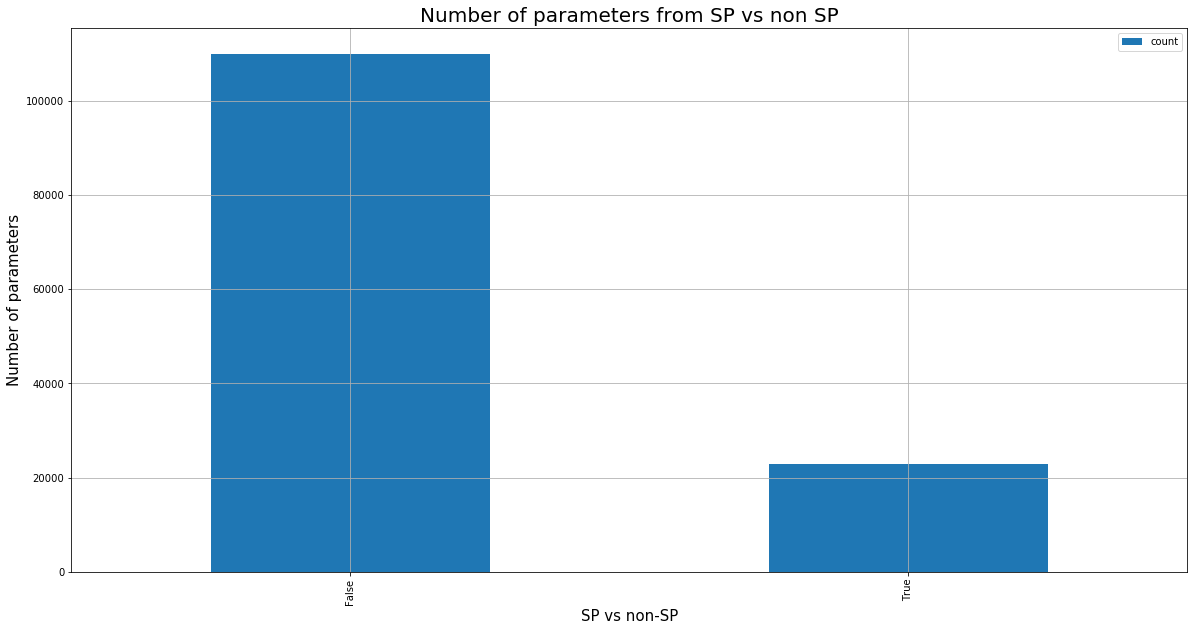

In [60]:
using_shared_param["FamilyName"].plot(kind="bar", grid=True);
plt.title("Number of parameters from SP vs non SP", fontsize=20)
plt.xlabel("SP vs non-SP", fontsize=15)
plt.ylabel("Number of parameters", fontsize=15)
plt.show()

## Families that are using shared parameters

In [61]:
nameAndSp = p[["FamilyName", "ParameterName", "BVNparam"]]

nameAndSp.head(10)

,FamilyName,ParameterName,BVNparam
0,Window_Square Opening_WIN,Analytic Construction,False
1,Window_Square Opening_WIN,Assembly Code,False
2,Window_Square Opening_WIN,Construction Type,False
3,Window_Square Opening_WIN,Cost,False
4,Window_Square Opening_WIN,Description,False
5,Window_Square Opening_WIN,Heat Transfer Coefficient (U),False
6,Window_Square Opening_WIN,Height,False
7,Window_Square Opening_WIN,Keynote,False
8,Window_Square Opening_WIN,Manufacturer,False
9,Window_Square Opening_WIN,Model,False


In [62]:
not_legit_param = nameAndSp[nameAndSp.BVNparam==True]

print "Number of non-BVN subcategories:", not_legit_param.shape

not_legit_param.head(10)

Number of non-BVN subcategories: (22866, 3)


,FamilyName,ParameterName,BVNparam
32,Window_Round Opening_WIN,Radius,True
58,Window Round_basic,Material Frame,True
87,Window Lancet_basic,Material Frame,True
115,Window Arched Top_basic,Material Frame,True
165,Skylight_Operable_WIN,Glazing,True
166,Skylight_Operable_WIN,Glazing Material,True
172,Skylight_Operable_WIN,Mullion Height,True
184,Skylight_Operable_WIN,Window Blind Type,True
185,Skylight_Operable_WIN,Window Jockey Sash,True
186,Skylight_Operable_WIN,Window Louvre,True


In [63]:
not_legit_param.ParameterName.unique()

array([u'Radius', u'Material Frame', u'Glazing', u'Glazing Material',
       u'Mullion Height', u'Window Blind Type', u'Window Jockey Sash',
       u'Window Louvre', u'Window Shade Centre', u'Window Shade Left',
       u'Window Shade Right', u'Window Shade Top', u'Windowframefinish',
       u'Windowframematerial', u'Windowframetype', u'Windowglazingtype',
       u'Windowheadheight', u'Windowoverallframeheight',
       u'Windowoverallframewidth', u'DAF_Revision number_t',
       u'WNF_Ext Frame_Offset_Internal Skin_i',
       u'WNF_Frame_Surround_Depth_t', u'WNF_Frame_Surround_Width_t',
       u'WNF_Overall Frame Height_t', u'WNF_Overall Frame Width_t',
       u'WNF_Panel_Main Fixed_Height_t', u'WNF_Panel_Main Fixed_Width_t',
       u'CreatedBy_ANZRS', u'CreatedByURL_ANZRS', u'Panel Height',
       u'WNP_Schedule Filter_Louvre_t', u'Bars', u'Panel Width',
       u'Door Undercut', u'Author', u'Copyright', u'Modified Issue',
       u'Length', u'Either Side Swing Away', u'Either Side Swing

## No. of SP parameters vs non-BVN SP parameters of each family

In [64]:
check_for_sp = nameAndSp.groupby(["FamilyName", "BVNparam"]).agg(["count"])

check_for_sp.head()

ParameterName
                                           count
FamilyName                BVNparam              
1 Bay Window              False               33
                          True                 1
1 Bay Window - Non Hosted False               30
10P_Perimeter_Bench_FYS   False               17
115_BVNDH_WC Cubicle      False               25

## Filters shared parameters that aren't being used in the Master Content (*dead shared parameters*)

In [95]:
spBVN = set(p_BVN)
p_All = set(list(nameAndSp.ParameterName))
dead_param = spBVN - p_All

dead_param

Q:\Users\arivera\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


{'A3 Scale',
 'AS1482 Tolerance',
 'Acoustic Rating Rw',
 'Adaptable',
 'Additional Info- Fourth Line',
 'Area Colour',
 'BVN Alphabet',
 'Balcony Area',
 'Category Color',
 'Ceiling Acoustic Rating',
 'Client Project Number',
 'Configured By',
 'Consultant 01',
 'Consultant 01 Details',
 'Consultant 02',
 'Consultant 02 Details',
 'Consultant 03',
 'Consultant 03 Details',
 'Consultant 04',
 'Consultant 04 Details',
 'Consultant 05',
 'Consultant 05 Details',
 'Copyright \xc2\xa9',
 'Core Name',
 'Discipline',
 'Expected Lifespan (Years)',
 'Ext Frame_Offset EQUAL Host Wall thickness_i',
 'Flux Id',
 'HsbType',
 'Ideate BIMLink',
 'ItemCode_2',
 'ItemDescription_2',
 'ItemGroup_2',
 'Level - Second Line',
 'Lining_"Opposite Side"',
 'Lining_"Placement Side"',
 'Maintenance Schedule (Months)',
 'Original Model By',
 'Package',
 'Panel 1 Height',
 'Panel 1 Width',
 'Place in Structural Wall_i',
 'Project Manager',
 'Project Managers Details',
 'Project Stage',
 'Project Stage Code',
 'P

In [99]:
# This tries to regex search for non ascii chars, BUT it doesn't work because the notebook isn't in unicode.
# however, the strings that cause the error are also the ones that we're looking for, so a try except does the job!
import re
nonUnicode = re.compile("[^\x00-\x7F]")

for p in list(p_All):
    try:
        p = str(p)
        if re.match(nonUnicode, p):
            print p
    except Exception as e:
        print p#, e

Primary Pump Flow  for 11Â°C
Copyright Â©
Plan swing_90Â°_i
Plan swing_30Â°_i
Plan swing_180Â°_Offset from wall_i
Plan swing_45Â°_i
DO NOT EDIT_Stacking_Plan rep_90Â°within opening_Visible_t
DO NOT EDIT_Stacking_Plan rep_90Â°beyond opening_Visible_i
DO NOT EDIT_Stacking_Plan rep_90Â°beyond opening_Visible_t
DO NOT EDIT_Stacking_Plan rep_180Â°_Visible_t
Plan swing_180Â°_i
WB STANDARD donâ€™t change
Plan swing_Double acting_90Â°_i


# MATERIALS

**m_path** and **m** reads from the ParameterValuesByTypes excel file.

In [74]:
m_path = os.path.join(directory, file_dict["Materials"])
m = pd.read_excel(m_path)

m["FamilyFilePath"] = m.apply(remove_rfaName, axis=1)
m["FamilyFilePath"] = m.apply(stripCommonPath, axis=1)
m["FamilyName"] = m.apply(stripFileType, axis=1)

m.drop(["ID", "MaterialColour", "Shininess", "Smoothness", "Transparency"], axis=1, inplace=True)

m.head()

,FamilyFilePath,FamilyName,Name,CutPatternName,CutPatternColour,SurfacePatternName,SurfacePatternColour
0,Windows\Structural,Window_Square Opening_WIN,Default,n/a,n/a,n/a,n/a
1,Windows\Structural,Window_Square Opening_WIN,Default Roof,n/a,n/a,n/a,n/a
2,Windows\Structural,Window_Square Opening_WIN,Default Wall,n/a,n/a,n/a,n/a
3,Windows\Structural,Window_Square Opening_WIN,Glass,n/a,n/a,n/a,n/a
4,Windows\Structural,Window_Square Opening_WIN,Poche,n/a,n/a,n/a,n/a


In [75]:
nameAndMat = m[["FamilyName", "Name"]]

nameAndMat.head()

,FamilyName,Name
0,Window_Square Opening_WIN,Default
1,Window_Square Opening_WIN,Default Roof
2,Window_Square Opening_WIN,Default Wall
3,Window_Square Opening_WIN,Glass
4,Window_Square Opening_WIN,Poche


In [76]:
mat_grouped = nameAndMat.groupby("FamilyName").agg(["count"])

mat_grouped

,Name
,count
FamilyName,
1 Bay Window,11
1 Bay Window - Non Hosted,19
10P_Perimeter_Bench_FYS,22
115_BVNDH_WC Cubicle,12
12P_Meeting_FYS,28
140 Block_DCO,12
14P_Meeting_Rectangle_FYS,26
16P_Meeting_Rectangle_ FYS,26


In [77]:
mat_counts = mat_grouped["Name"]
mat_counts[mat_counts["count"]>100]

,count
FamilyName,
Drainage_Roof Drain 100mm_DCO,278
Drainage_Roof Drain 150mm_DCO,278
Drainage_Roof Drain 200mm_DCO,278
Drainage_Roof Drain_DCO,278
Dulux_ Colour Family_Blues_GEN,1144
Dulux_ Colour Family_Bolds and Brights_GEN,144
Dulux_ Colour Family_Greens_GEN,968
Dulux_ Colour Family_New Zealand_GEN,120
Dulux_ Colour Family_Oranges_GEN,264


## No. of unique materials

In [78]:
print len(nameAndMat.Name.unique())

6944


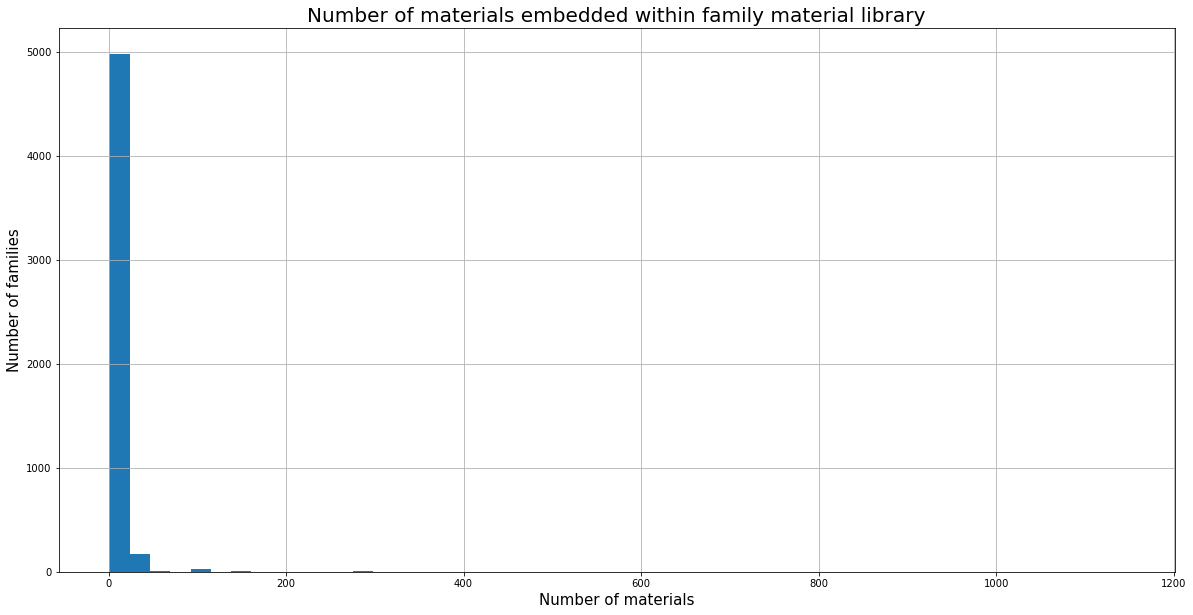

In [79]:
mat_grouped["Name"].hist(bins=50);
plt.title("Number of materials embedded within family material library", fontsize=20)
plt.xlabel("Number of materials", fontsize=15)
plt.ylabel("Number of families", fontsize=15)
plt.show()